In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/220506_mouse_testis_analysis.h5ad'

In [4]:
adata = sc.read_h5ad('write/220506_mouse_testis_processing.h5ad')  

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


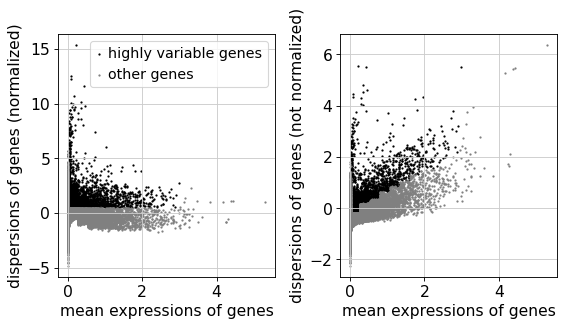

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

In [9]:
adata

View of AnnData object with n_obs × n_vars = 2530 × 2954
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doublet_info_colors', 'log1p', 'hvg'

In [10]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_ribo']
    sparse input is densified and may lead to high memory use
    finished (0:00:09)


In [11]:
sc.pp.scale(adata, max_value=10)

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


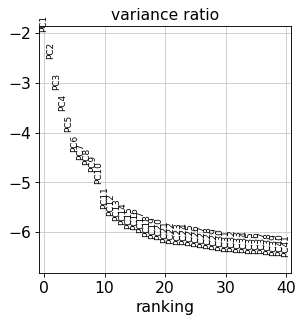

In [13]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=40)

In [14]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 2530 × 2954
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [17]:
sc.tl.leiden(adata, resolution = 0.05, key_added = "leiden_0.05")

running Leiden clustering
    finished: found 5 clusters and added
    'leiden_0.05', the cluster labels (adata.obs, categorical) (0:00:00)


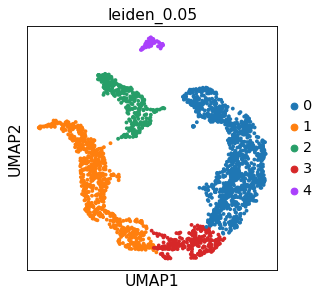

In [18]:
sc.pl.umap(adata, color='leiden_0.05')

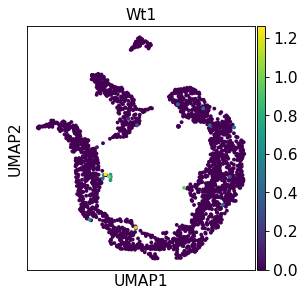

In [19]:
sc.pl.umap(adata, color='Wt1')

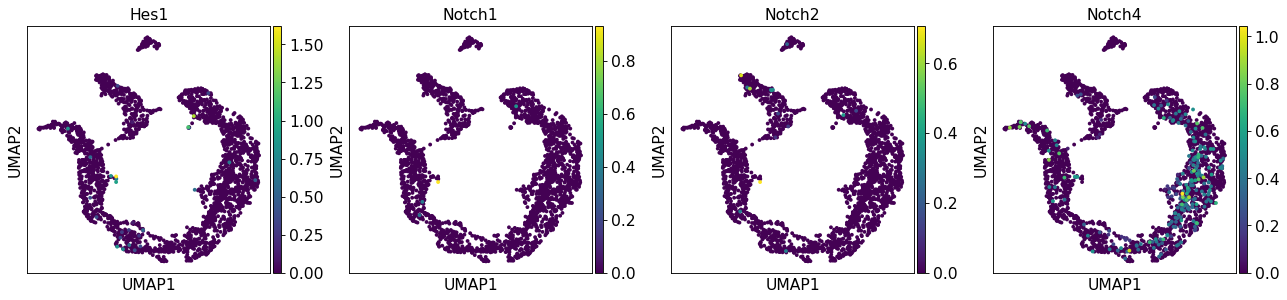

In [20]:
sc.pl.umap(adata, color=['Hes1','Notch1','Notch2','Notch4'])

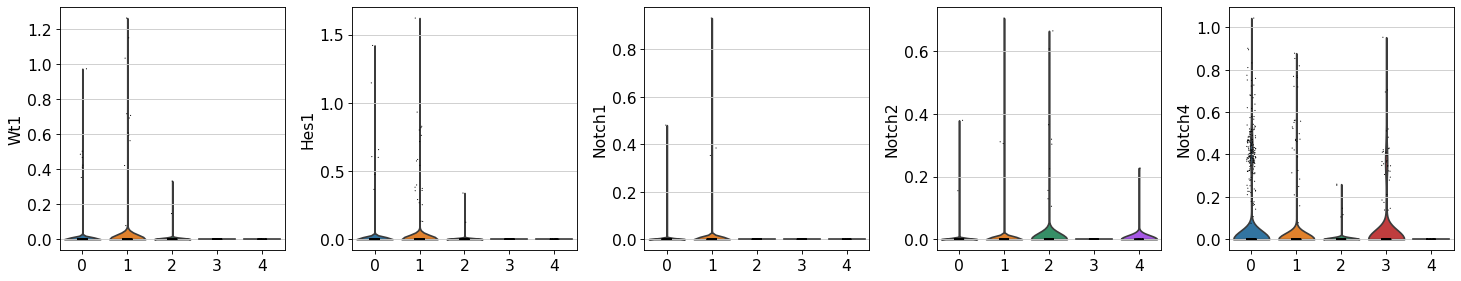

In [21]:
sc.pl.violin(adata, ['Wt1','Hes1','Notch1','Notch2','Notch4'], groupby='leiden_0.05', rotation = 0)

In [22]:
marker_genes = {
    'Sertoli':['Wt1'],
    'PTM':['Acta2'],
    'LC':['Igf1'],
    'Endotherial':['Cd34'],
    'Blood':['Cd74'],
    #'Macrophage':['AIF1','CD68'],
    'Stroma':['Sparcl1'],
    #'Fibroblasts':['FSP1'],
    'PGC':['Sox17'],
    'PreSG':['Magea4'],
    'SSC':['Stk31'],
    #'Progenitors':[ 'NANOS3', 'MAGEA4'],
    'Undiff SPG':['Utf1'],
    'Diff SPG':['Sohlh1'],
    'SPC':['Sycp3'],
    'St':['Prm1']
}

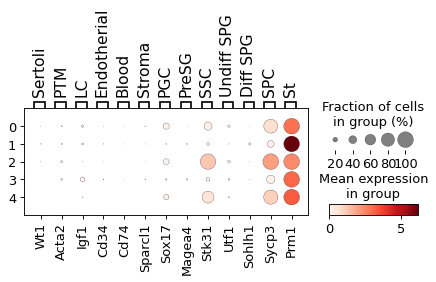

In [23]:
sc.pl.dotplot(adata, marker_genes, 'leiden_0.05', dendrogram=False)

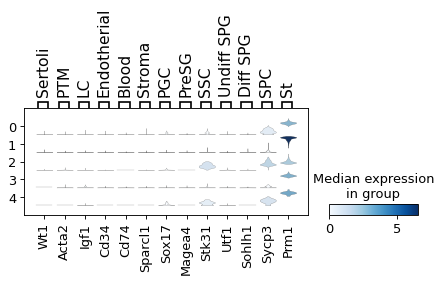

In [24]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden_0.05', rotation = 0)

In [25]:
marker_genes = {
    'Wt1',
    'Acta2',
    'Igf1',
    'Cd34',
    'Cd74',
    'Sparcl1',
    'Sox17',
    'Magea4',
    'Stk31',
    'Utf1',
    'Sohlh1',
    'Sycp3',
    'Prm1'
}

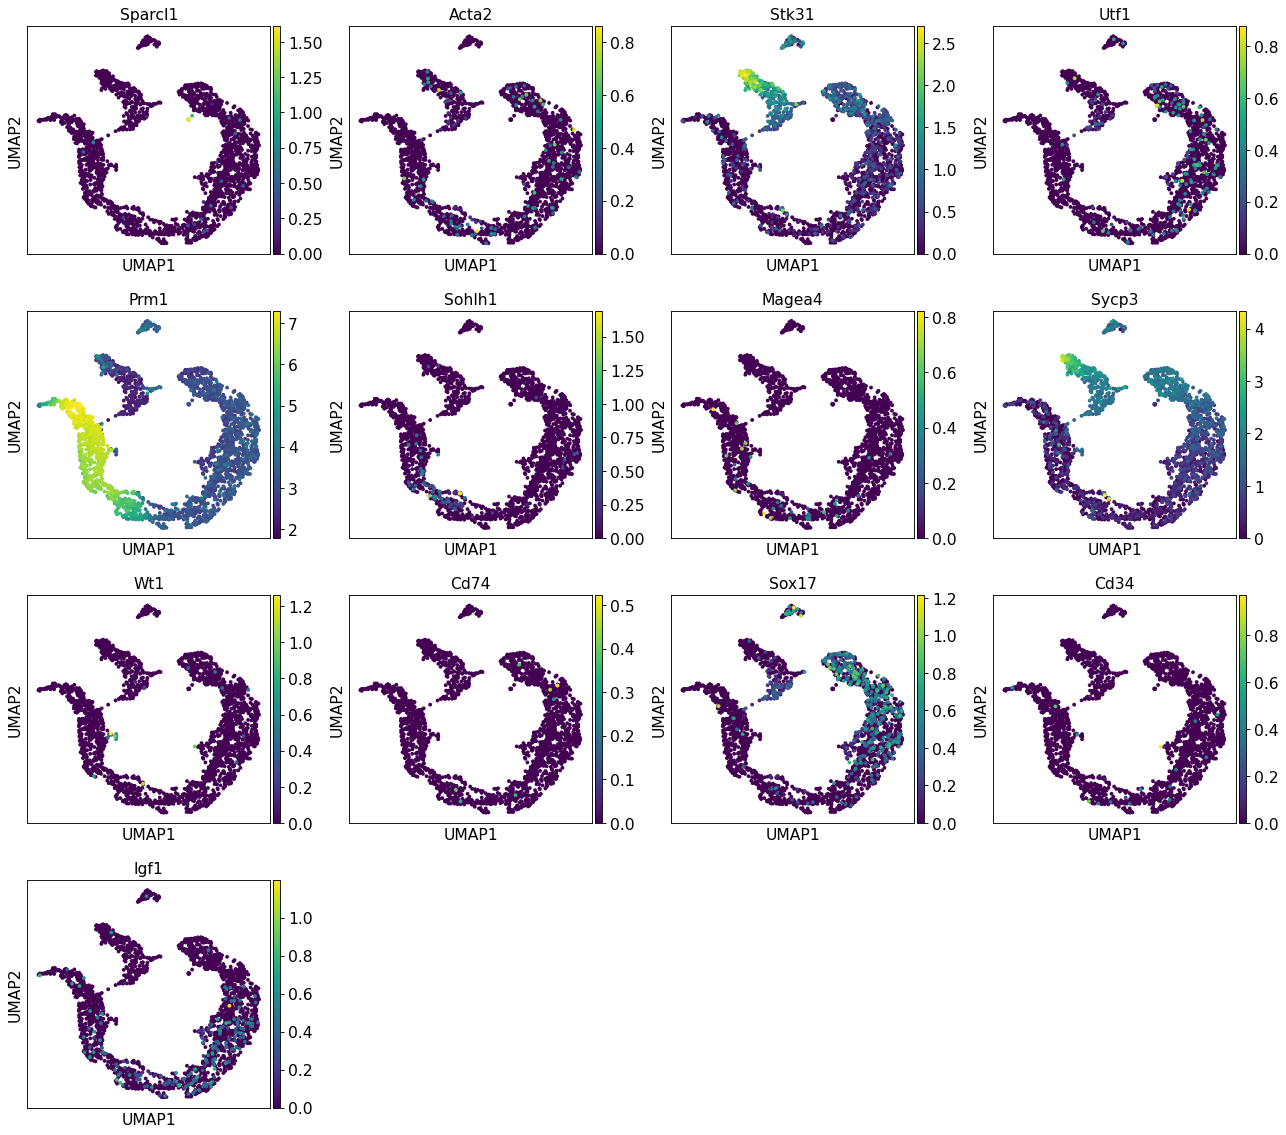

In [26]:
sc.pl.umap(adata, color=marker_genes)